In [1]:
import scipy.io as sio
def load_params(path,key_name):
    data = sio.loadmat(path)
    data = data[key_name]
    return data
mat_test=load_params('/data1/zzhou/pseudotime/scPN/data/simulation.mat', 'results_MP')
mat_data=mat_test[0][0]
A=mat_test[0][0]['B'] 
initial=mat_test[0][0]['x_init']
A_hat=mat_test[0][0]['B_hat']
# delta=mat_test[0][0]['delta']
theta=mat_test[0][0]['theta']
alpha=mat_test[0][0]['alpha']

In [2]:
# create data
import numpy as np
import pandas as pd
import scipy.io as sio
def fitznaglc_original(x,t, A,alpha,theta, n=A.shape[0]):
    dydt = np.zeros(n)
    for i in range(n):
        tmp=x[i]*(alpha[i]-theta[i]*x[i])
        for j in range(n):
            tmp=tmp+(A[i,j]*x[i]*x[j]*x[j]/(1+x[j]*x[j]))
        dydt[i]=tmp
    return dydt
from scipy.integrate import odeint
import matplotlib.pyplot as plt
y0 = initial[:,0]
t = np.linspace(0, 0.05, 50)
n=A.shape[0]
sol_MP = odeint(fitznaglc_original, y0, t, args=(A,alpha,theta, n))



/data1/zzhou/anaconda3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/data1/zzhou/anaconda3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/tmp/ipykernel_24655/3421760522.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dydt[i]=tmp


In [21]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize

def fitznaglc_original(x, t, A, alpha, theta, n):
    dydt = np.zeros(n)
    for i in range(n):
        tmp = x[i] * (alpha[i] - theta[i] * x[i])
        for j in range(n):
            tmp += A[i, j] * x[i] * x[j]**2 / (1 + x[j]**2)
        dydt[i] = tmp
    return dydt

def objective_function(A_flat, y0, t, alpha, theta, sol_MP):
    n = len(alpha)
    A = A_flat.reshape((n, n))
    sol_pred = odeint(fitznaglc_original, y0, t, args=(A, alpha, theta, n))
    return np.sum((sol_pred - sol_MP)**2)

# 初始条件
y0 = initial[:, 0]  # 高维初始条件
t = np.linspace(0, 0.05, 50)  # 时间范围
n = A.shape[0]

# 展平初始的 A 矩阵作为优化的初始猜测
A_initial_flat = A.flatten()

# 使用最小化器来拟合 A 矩阵
result = minimize(objective_function, A_initial_flat, args=(y0, t, alpha, theta, sol_MP), method='L-BFGS-B')

# 将优化后的 A_flat 重新整形为矩阵
A_recovered = result.x.reshape((n, n))



/tmp/ipykernel_20825/4249452844.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dydt[i] = tmp


Recovered A matrix:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.87634913 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.24186553 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [42]:
initial[:,0]

array([1.72013513, 2.28299688, 1.13737479, 0.54588482, 2.90473195,
       2.16484905, 0.70080418, 1.50629848, 2.63643953, 0.33007764,
       2.21216259, 3.06063172, 3.46750244, 2.1690403 , 1.02524704,
       3.70788667, 2.63372765, 2.31815621, 3.66969974, 0.35132244,
       0.39763323, 3.09382303, 2.66315828, 1.44557021, 2.57899271,
       1.84342431, 0.10413678, 0.04064656, 3.32158898, 2.12474139,
       3.78157105, 3.75541642, 3.58132165, 1.90026715, 2.22741202,
       3.46470252, 0.33095838, 0.18752091, 1.23606476, 0.99982447,
       2.45159915, 2.26828538, 3.47633901, 3.62420118, 2.89930659,
       1.92905335, 1.86494231, 1.33892509, 0.26508608, 0.61693025,
       1.63689931, 0.16348109, 3.83017376, 2.95848982, 3.17954537,
       0.23533879, 1.30766956, 0.13959791, 0.80054535, 0.17257348,
       3.47104375, 0.25380552, 3.68177641, 1.95999115, 0.22966211,
       3.89753549, 0.92927441, 3.0119583 , 1.89332983, 1.6193594 ,
       3.94744562, 2.21428191, 3.78531475, 2.93976266, 0.31759

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from numpy.matlib import rand
from matplotlib.artist import getp
import copy
import pandas as pd
import scipy.io as sio
def load_params(path,key_name):
    data = sio.loadmat(path)
    data = data[key_name]
    return data
mat_test=load_params('/data1/zzhou/pseudotime/scPN/data/simulation.mat', 'results_MP')
mat_data=mat_test[0][0]
A=mat_test[0][0]['B'] 
initial=mat_test[0][0]['x_init']
A_hat=mat_test[0][0]['B_hat']
# delta=mat_test[0][0]['delta']
theta=mat_test[0][0]['theta']
alpha=mat_test[0][0]['alpha']
def getdistance(A,coordinates):

    n=coordinates.shape[0]
    distance=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            distance[i][j] = np.linalg.norm(coordinates[i, :] - coordinates[j, :]) + np.linalg.norm(
                 - A @ coordinates[j, :] + A @ coordinates[i, :])
#     for i in range(n):
#         for j in range(n):
#             if distance[i][j] == 0:
#                 distance[i][j] = sys.maxsize
    return distance




#     draw(best)
def dy(route, x):
    m,n=x.shape
    dy1 = np.zeros((m-5, n))
    deltat = 1 / (m-1)
    for t in range(2, m - 3):
        dy1[t - 2, :] = (8 * x[route[t + 1], :] - 8 * x[route[t - 1], :] + x[route[t - 2], :] - x[route[t + 2], :]) / (
                    12 * deltat)
    # print(dy1[0,:]-true_)
    return dy1
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
def fitznaglc_original(x, t, A, alpha, theta, n):
    dydt = np.zeros(n)
    for i in range(n):
        tmp = x[i] * (alpha[i] - theta[i] * x[i])
        for j in range(n):
            tmp += A[i, j] * x[i] * x[j]**2 / (1 + x[j]**2)
        dydt[i] = tmp
    return dydt
def objective_function(A_flat, y0, t, alpha, theta, sol_MP):
    n = len(alpha)
    A = A_flat.reshape((n, n))
    print(y0.shape)

    sol_pred = odeint(fitznaglc_original, y0, t, args=(A, alpha, theta, n))
    return np.sum((sol_pred - sol_MP)**2)

def recover_matrix(initial, t, alpha, theta, sol_MP):
  # Example initialization
    y0 = initial
    print(y0.shape)
    n = A.shape[0]

    # Flatten the initial A matrix for optimization
    A_initial_flat = A.flatten()
    options = {
    'maxiter': 10,    # Reduce the number of iterations
    'disp': True      # Display convergence messages
    }

    # Minimize the objective function
    result = minimize(objective_function, A_initial_flat, args=(y0, t, alpha, theta, sol_MP), method='L-BFGS-B',options=options)

    # Recover the matrix A
    A_recovered = result.x.reshape((n, n))

    return A_recovered


if __name__ == "__main__":
    #Test：1减少genes 2.修改 solve_tsp_simulated_annealing  prpr  3.
    # A=np.random.rand(1000,1000)
    import scanpy as sc
    print('start training')


    adata=sol_MP
    print(type(adata))
    A=np.zeros((100,100))
#     A = pd.read_csv('A200_infer.csv',header=None).values
#     initial=pd.read_csv('Answer.csv',header=None).values

#     initial=np.arange(50)
    coord= np.matrix(adata)
    w, h = coord.shape
    coordinates = np.zeros((w, h), float)
    for i in range(w):
        for j in range(h):
            coordinates[i, j] = float(coord[i,j])

    n = coordinates.shape[0]

    from python_tsp.exact import solve_tsp_dynamic_programming
    from python_tsp.heuristics import solve_tsp_simulated_annealing
    from python_tsp.heuristics import solve_tsp_local_search


    distance_matrix=getdistance(A,coordinates)

    route, distance = solve_tsp_simulated_annealing(distance_matrix)
    route,distance=solve_tsp_local_search(distance_matrix, x0=route)
    route,distance= solve_tsp_local_search(distance_matrix, x0=route, perturbation_scheme="ps3")
    print(route,distance)
    for i in range(1):
        print('loop+1')
        A = recover_matrix(initial[:,0], t, alpha, theta, sol_MP)
        distance_matrix=getdistance(A,coordinates)

        route,distance=solve_tsp_simulated_annealing(distance_matrix,x0=route)
        route,distance= solve_tsp_local_search(distance_matrix, x0=route, perturbation_scheme="ps3")



start training
<class 'numpy.ndarray'>
[50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1] 2.689285104966611
loop+1
(100,)
(100,)


/tmp/ipykernel_22616/316356337.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dydt[i] = tmp


(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)

(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)

(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)

(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)

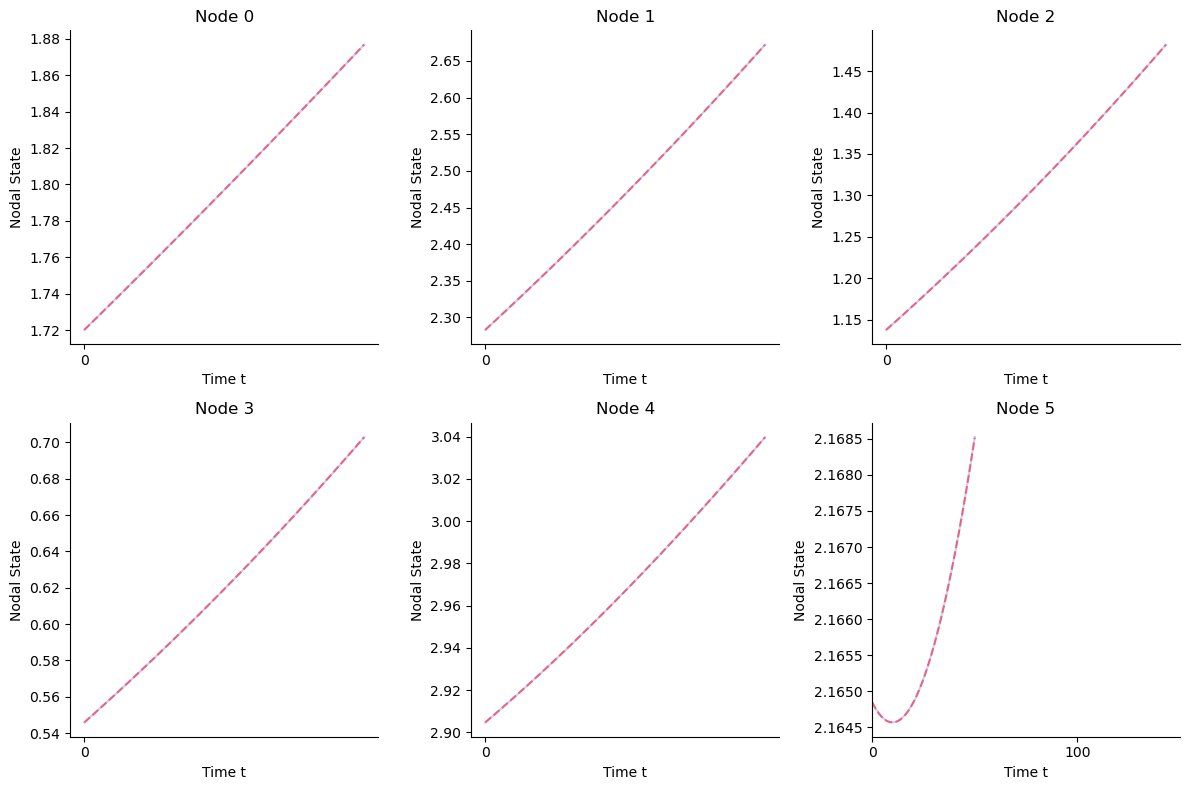

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import MultipleLocator
# 生成一些示例数据
t = np.linspace(0,50,50)

# 创建一个2x3的子图布局
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# 定义颜色和线型
colors = ['b', 'g', 'r', 'c', 'm', 'y']
linestyles = ['-', '--', '-.', ':', '-', '--']
Choose=np.arange(100)
# 在每个子图中绘制6条曲线
for i, ax in enumerate(axes.flat):
    ax.plot(t, sol_MP[:,Choose[i]], color='b', linestyle=linestyles[0],alpha=0.2)
    ax.plot(t, sol1[:,Choose[i]], color='r', linestyle=linestyles[1],alpha=0.5)
    ax.set_title(f'Node {Choose[i]}')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlim(0,150)
    x_major_locator=MultipleLocator(100)
    ax.xaxis.set_major_locator(x_major_locator)


# 添加横纵轴标签
for ax in axes.flat:
    ax.set(xlabel='Time t', ylabel='Nodal State')

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

# 假设 t, sol, sol1, Choose, linestyles 已经定义
total_plots = 100  # 总图像数
plots_per_figure = 10  # 每张大图包含的子图数量

# 循环生成并保存图像
for batch in range(0, total_plots, plots_per_figure):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 2x5网格
    
    for i in range(plots_per_figure):
        idx = batch + i
        if idx >= total_plots:
            break  # 防止超出索引范围
        
        ax = axes.flat[i]
        ax.plot(t, sol_MP[:, Choose[idx]], color='b', linestyle=linestyles[0], alpha=0.2)
        ax.plot(t, sol1[:, Choose[idx]], color='r', linestyle=linestyles[1], alpha=0.5)
        ax.set_title(f'Node {Choose[idx]}')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlim(0, 150)
        x_major_locator = MultipleLocator(100)
        ax.xaxis.set_major_locator(x_major_locator)
    
    # 添加横纵轴标签
    for ax in axes.flat:
        ax.set(xlabel='Time t', ylabel='Nodal State')

    # 调整布局并保存当前10张图像的大图
    plt.tight_layout()
    plt.savefig(f'combined_image_{batch // plots_per_figure + 1}.png')
    plt.close(fig)  # 关闭当前图像，释放内存
    print(f'Saved combined image batch {batch // plots_per_figure + 1}')



Saved combined image batch 1
Saved combined image batch 2
Saved combined image batch 3
Saved combined image batch 4
Saved combined image batch 5
Saved combined image batch 6
Saved combined image batch 7
Saved combined image batch 8
Saved combined image batch 9
Saved combined image batch 10


/tmp/ipykernel_23137/210130361.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dydt[i]=tmp


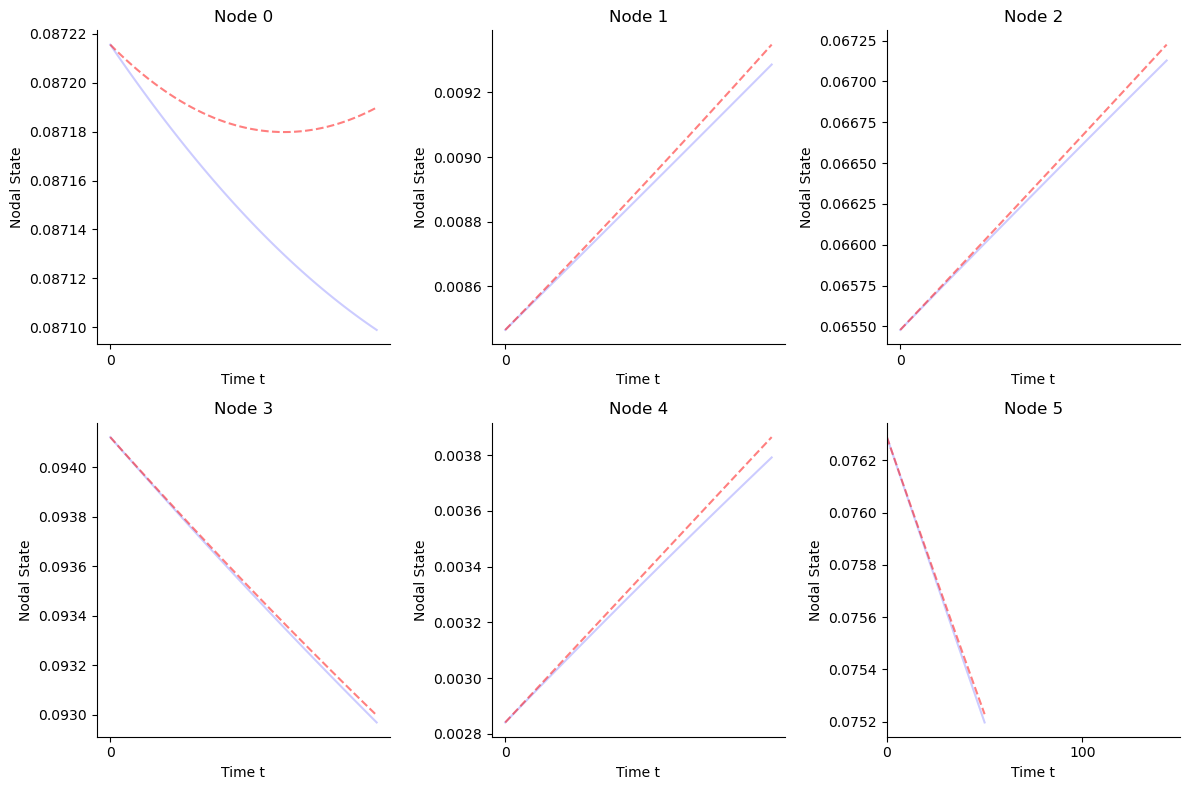

In [35]:
# create data
import numpy as np
import pandas as pd
import scipy.io as sio
def load_params(path,key_name):
    data = sio.loadmat(path)
    data = data[key_name]
    return data
mat_test=load_params('/data1/zzhou/pseudotime/scPN/data/simulation.mat', 'results_SIS')
mat_data=mat_test[0][0]
A=mat_test[0][0]['B'] 
initial=mat_test[0][0]['x_init']
A_hat=mat_test[0][0]['B_hat']
delta=mat_test[0][0]['delta']

def fitznaglc_original(x,t, A,delta,n=A.shape[0]):
    dydt = np.zeros(n)
    for i in range(n):
        tmp=-delta[i]*x[i]
        for j in range(n):
            tmp=tmp+(A[i,j]*x[j]*(1-x[i]))
        dydt[i]=tmp
    return dydt
from scipy.integrate import odeint
import matplotlib.pyplot as plt
y0 = initial[:,0]
t = np.linspace(0, 0.01, 50)
n=A.shape[0]
sol = odeint(fitznaglc_original, y0, t, args=(A,delta,n))
sol1=odeint(fitznaglc_original, y0, t, args=(A_hat,delta,n))
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import MultipleLocator
# 生成一些示例数据
t = np.linspace(0,50,50)

# 创建一个2x3的子图布局
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# 定义颜色和线型
colors = ['b', 'g', 'r', 'c', 'm', 'y']
linestyles = ['-', '--', '-.', ':', '-', '--']
Choose=np.arange(100)
# 在每个子图中绘制6条曲线
for i, ax in enumerate(axes.flat):
    ax.plot(t, sol[:,Choose[i]], color='b', linestyle=linestyles[0],alpha=0.2)
    ax.plot(t, sol1[:,Choose[i]], color='r', linestyle=linestyles[1],alpha=0.5)
    ax.set_title(f'Node {Choose[i]}')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlim(0,150)
    x_major_locator=MultipleLocator(100)
    ax.xaxis.set_major_locator(x_major_locator)


# 添加横纵轴标签
for ax in axes.flat:
    ax.set(xlabel='Time t', ylabel='Nodal State')

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()



In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize

def fitznaglc_original(x,t, A,delta,n=A.shape[0]):
    dydt = np.zeros(n)
    for i in range(n):
        tmp=-delta[i]*x[i]
        for j in range(n):
            tmp=tmp+(A[i,j]*x[j]*(1-x[i]))
        dydt[i]=tmp
    return dydt

def objective_function(A_flat, y0, t, delta, sol):
    n = len(alpha)
    A = A_flat.reshape((n, n))
    sol_pred = odeint(fitznaglc_original, y0, t, args=(A, delta, n))
    return np.sum((sol_pred - sol)**2)

# 初始条件
y0 = initial[:, 0]  # 高维初始条件
t = np.linspace(0, 0.01, 50)  # 时间范围
n = A.shape[0]

# 展平初始的 A 矩阵作为优化的初始猜测
A_initial_flat = A.flatten()

# 使用最小化器来拟合 A 矩阵
result = minimize(objective_function, A_initial_flat, args=(y0, t, delta, sol_MP), method='L-BFGS-B')

# 将优化后的 A_flat 重新整形为矩阵
A_recovered = result.x.reshape((n, n))


/tmp/ipykernel_23137/3344175848.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dydt[i]=tmp


In [ ]:
np.save('matrix.npy',A_recovered)

In [34]:
# create data
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.io as sio
def load_params(path,key_name):
    data = sio.loadmat(path)
    data = data[key_name]
    return data
mat_test=load_params('/data1/zzhou/pseudotime/scPN/data/simulation.mat', 'results_cw')
mat_data=mat_test[0][0]
A=mat_test[0][0]['B'] 
initial=mat_test[0][0]['x_init']
A_hat=mat_test[0][0]['B_hat_cw_hat']
def fitznaglc_original(x,t, A, n=A.shape[0]):
    dydt = np.zeros(n)
    for i in range(n):
        tmp=-x[i]
        for j in range(n):
            tmp=tmp+A[i,j]*1/(1+np.exp(-x[j]+1))
        dydt[i]=tmp
    return dydt
from scipy.integrate import odeint
import matplotlib.pyplot as plt
y0 = initial[:,0]
t = np.linspace(0, 0.8,50)
n=A.shape[0]
sol = odeint(fitznaglc_original, y0, t, args=(A, n))
sol1 = odeint(fitznaglc_original, y0, t, args=(A_hat, n))
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

# 假设 t, sol, sol1, Choose, linestyles 已经定义
total_plots = 100  # 总图像数
plots_per_figure = 10  # 每张大图包含的子图数量

# 循环生成并保存图像
for batch in range(0, total_plots, plots_per_figure):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 2x5网格
    
    for i in range(plots_per_figure):
        idx = batch + i
        if idx >= total_plots:
            break  # 防止超出索引范围
        
        ax = axes.flat[i]
        ax.plot(t, sol[:, Choose[idx]], color='b', linestyle=linestyles[0], alpha=0.2)
        ax.plot(t, sol1[:, Choose[idx]], color='r', linestyle=linestyles[1], alpha=0.5)
        ax.set_title(f'Node {Choose[idx]}')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlim(0, 1)
        x_major_locator = MultipleLocator(100)
        ax.xaxis.set_major_locator(x_major_locator)
    
    # 添加横纵轴标签
    for ax in axes.flat:
        ax.set(xlabel='Time t', ylabel='Nodal State')

    # 调整布局并保存当前10张图像的大图
    plt.tight_layout()
    plt.savefig(f'combined_image_{batch // plots_per_figure + 1}.png')
    plt.close(fig)  # 关闭当前图像，释放内存
    print(f'Saved combined image batch {batch // plots_per_figure + 1}')



Saved combined image batch 1
Saved combined image batch 2
Saved combined image batch 3
Saved combined image batch 4
Saved combined image batch 5
Saved combined image batch 6
Saved combined image batch 7
Saved combined image batch 8
Saved combined image batch 9
Saved combined image batch 10


In [3]:
import scipy.io as sio
def load_params(path,key_name):
    data = sio.loadmat(path)
    data = data[key_name]
    return data
mat_test=load_params('/data1/zzhou/pseudotime/scPN/data/simulation.mat', 'results_SIS')
mat_data=mat_test[0][0]
A=mat_test[0][0]['B'] 
initial=mat_test[0][0]['x_init']
A_hat=mat_test[0][0]['B_hat']
delta=mat_test[0][0]['delta']

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import numba

# Using numba to accelerate only the core calculation
@numba.jit(nopython=False)
def fitznaglc_core(x, A, delta):
    n = len(x)
    dydt = np.empty(n)
    for i in range(n):
        tmp = -delta[i] * x[i]
        for j in range(n):
            tmp += A[i, j] * x[j] * (1 - x[i])
        dydt[i] = tmp
    return dydt

def fitznaglc_original(t, x, A, delta):
    return fitznaglc_core(x, A, delta)

def solve_ode(A, y0, t, delta):
    return solve_ivp(fitznaglc_original, [t[0], t[-1]], y0, t_eval=t, args=(A, delta), method='LSODA').y.T

def objective_function(A_flat, y0, t, delta, sol_MP):
    n = len(delta)
    A = A_flat.reshape((n, n))
    sol_pred = solve_ode(A, y0, t, delta)
    return np.sum((sol_pred - sol_MP)**2)

# Assuming 'initial', 'delta', and 'A' are defined and properly initialized
y0 = initial[:, 0]  # High-dimensional initial conditions
t = np.linspace(0, 0.01, 50)  # Time range
n = A.shape[0]  # Size of the matrix

# Compute the reference solution
sol_MP = solve_ode(A, y0, t, delta)
B=np.zeros((100,100))
# Flatten initial A matrix as the initial guess for optimization
A_initial_flat = B.flatten()

# Use the optimizer to fit the A matrix, limiting max iterations
result = minimize(objective_function, A_initial_flat, args=(y0, t, delta, sol_MP), 
                  method='L-BFGS-B', options={'maxiter': 100})

# Reshape the optimized A_flat back to matrix form
A_recovered = result.x.reshape((n, n))

/tmp/ipykernel_24655/2628681436.py:7: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/tmp/ipykernel_24655/2628681436.py:7: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fitznaglc_core" failed type inference due to: No implementation of function Function(<built-in function setitem>) found for signature:
 
 >>> setitem(array(float64, 1d, C), int64, array(float64, 1d, C))
 
There are 16 candidate implementations:
      - Of which 16 did not match due to:
      Overload of function 'setitem': File: <numerous>: Line N/A.
        With argument(s): '(array(float64, 1d, C), int64, array(float64, 1d, C

/tmp/ipykernel_24655/2628681436.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return fitznaglc_core(x, A, delta)


In [ ]:
import torch
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# Using PyTorch to accelerate core calculations
def fitznaglc_core(x, A, delta):
    x = torch.tensor(x, dtype=torch.float32, device='cuda')
    A = torch.tensor(A, dtype=torch.float32, device='cuda')
    delta = torch.tensor(delta, dtype=torch.float32, device='cuda')
    n = len(x)
    dydt = torch.empty(n, device='cuda')
    for i in range(n):
        tmp = -delta[i] * x[i]
        for j in range(n):
            tmp += A[i, j] * x[j] * (1 - x[i])
        dydt[i] = tmp
    return dydt.cpu().numpy()

def fitznaglc_original(t, x, A, delta):
    return fitznaglc_core(x, A, delta)

def solve_ode(A, y0, t, delta):
    def wrapper(t, x):
        return fitznaglc_original(t, x, A, delta)
    return solve_ivp(wrapper, [t[0], t[-1]], y0, t_eval=t, method='LSODA').y.T

def objective_function(A_flat, y0, t, delta, sol_MP):
    n = len(delta)
    A = A_flat.reshape((n, n))
    sol_pred = solve_ode(torch.tensor(A, dtype=torch.float32, device='cuda'), 
                         y0, t, torch.tensor(delta, dtype=torch.float32, device='cuda'))
    return np.sum((sol_pred - sol_MP)**2)

# Assuming 'initial', 'delta', and 'A' are defined and properly initialized
y0 = torch.tensor(initial[:, 0], dtype=torch.float32, device='cuda').cpu().numpy()  # Initial conditions
t = np.linspace(0, 0.01, 50)  # Time range
n = A.shape[0]  # Size of the matrix

# Compute the reference solution
sol_MP = solve_ode(torch.tensor(A, dtype=torch.float32, device='cuda'), y0, t, torch.tensor(delta, dtype=torch.float32, device='cuda'))

# Flatten initial A matrix as the initial guess for optimization
B = torch.zeros((100, 100), dtype=torch.float32, device='cuda')
A_initial_flat = B.flatten().cpu().numpy()

# Use the optimizer to fit the A matrix, limiting max iterations
result = minimize(objective_function, A_initial_flat, args=(y0, t, delta, sol_MP), 
                  method='L-BFGS-B', options={'maxiter': 100})

# Reshape the optimized A_flat back to matrix form
A_recovered = result.x.reshape((n, n))


/tmp/ipykernel_24655/3276007975.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  A = torch.tensor(A, dtype=torch.float32, device='cuda')
/tmp/ipykernel_24655/3276007975.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  delta = torch.tensor(delta, dtype=torch.float32, device='cuda')


/tmp/ipykernel_24655/2628681436.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return fitznaglc_core(x, A, delta)


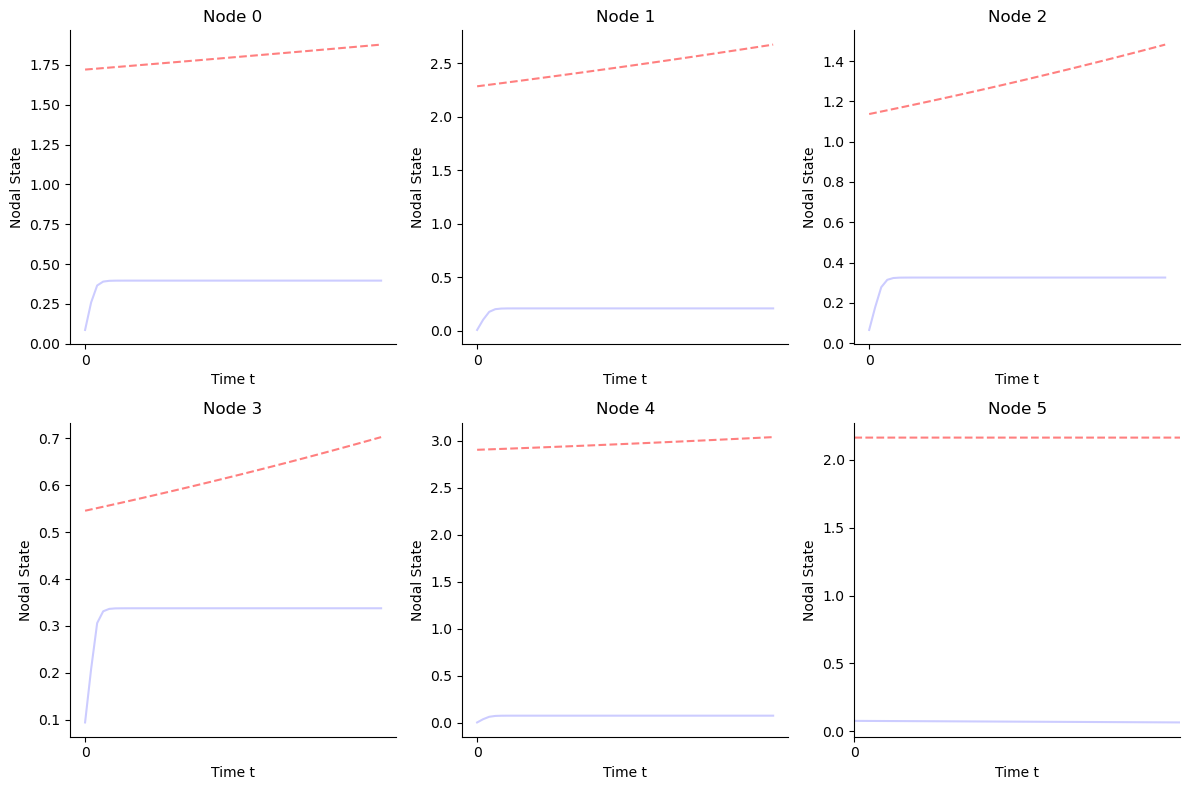

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import MultipleLocator
# 生成一些示例数据
t = np.linspace(0,50,50)
sol_MP = solve_ode(A, y0, t, delta)
sol_1 = solve_ode(A_recovered, y0, t, delta)
# 创建一个2x3的子图布局
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# 定义颜色和线型
colors = ['b', 'g', 'r', 'c', 'm', 'y']
linestyles = ['-', '--', '-.', ':', '-', '--']
Choose=np.arange(100)
# 在每个子图中绘制6条曲线
for i, ax in enumerate(axes.flat):
    ax.plot(t, sol_MP[:,Choose[i]], color='b', linestyle=linestyles[0],alpha=0.2)
    ax.plot(t, sol1[:,Choose[i]], color='r', linestyle=linestyles[1],alpha=0.5)
    ax.set_title(f'Node {Choose[i]}')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlim(0,1)
    x_major_locator=MultipleLocator(100)
    ax.xaxis.set_major_locator(x_major_locator)


# 添加横纵轴标签
for ax in axes.flat:
    ax.set(xlabel='Time t', ylabel='Nodal State')

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

In [ ]:
for i in range(10):
# Flatten initial A matrix as the initial guess for optimization
    A_initial_flat = A.flatten()
    

# Use the optimizer to fit the A matrix, limiting max iterations
    result = minimize(objective_function, A_initial_flat, args=(y0, t, delta, sol_MP_new), 
                      method='L-BFGS-B', options={'maxiter': 100})

# Reshape the optimized A_flat back to matrix form
    A_recovered = result.x.reshape((n, n))
    distance_matrix=getdistance(A_recovered,coordinates)
    route,distance=solve_tsp_simulated_annealing(distance_matrix,x0=route)
    route,distance= solve_tsp_local_search(distance_matrix, x0=route, perturbation_scheme="ps3")
    sol_MP_new=sol_MP[route]